# Notebook 1 - Limpeza e análise exploratória dos dados

##### Trabalho de Conclusão de Curso - Geologia / IGC / UFMG

Autores: [Franco Naghetini](https://github.com/fnaghetini) e [Guilherme Silveira](https://github.com/guiasilveira)

## Introdução

De forma geral, a **teoria do aprendizado estatístico supervisionado** visa aprender uma função desconhecida $f\colon x \mapsto y$ por meio do treinamento de um  agente  com exemplos $\left\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}),\ldots,(x^{(n)},y^{(n)})\right\}$ de entrada e saída da função.

Nesse sentido, o objetivo deste trabalho é solucionar uma tarefa supervisionada de classificação multinomial $T$ que consiste em predizer as unidades litoestratigráficas $y^{(i)}$ em um determinado domínio $D$ como função de sensores remotos $x_i$ e com base em anotações / interpretações $y^{(i)} = f(x^{(i)})$ feitas pelos geólogos que realizaram o mapeamento da área.

O produto final é um **mapa geológico preditivo 1:25.000 da região de Diamantina (MG)** que pode ser utilizado como um meio de reconciliação entre os dados / interpretações de campo e os sensores remotos. Nesse sentido, as inconsistências entre o mapa geológico e o mapa preditivo podem fornecer *insights* e orientar futuras campanhas de mapeamento na região.

## Sumário

<big><big>[Contexto geológico](#0)</big></big>

<big><big>[Configurações iniciais](#1)</big></big>

<big><big>[Visualização geoespacial](#2)</big></big>

<big><big>[Análise geral do banco de dados](#3)</big></big>

<big><big>[Variáveis e parâmetros globais](#4)</big></big>

<big><big>[Limpeza dos dados](#5)</big></big>

<big><big>[Visualização espacial](#6)</big></big>

<big><big>[Descrição univariada](#7)</big></big>

<big><big>[Descrição bivariada](#8)</big></big>


<big><big>[Exportação dos dados](#9)</big></big>

<a id='0'></a>
## Contexto geológico

 A área de estudo está localizada no Sudeste brasileiro próximo a cidade de Diamantina no contexto geotectônico da borda leste do Cráton São Francisco. A Serra do Espinhaço (SDE) estende-se por mais de 1200 Km em direção meridiana (Knauer, 2007), indo desde a borda Leste do Quadrilátero Ferrífero até o norte do estado da Bahia. A SDE pode ser dividida nos domínios setentrional e meridional, sendo a área de estudo pertencente à essa última. A parte Meridional, localizada no estado de Minas Gerais, possui um grande acervo de conhecimento geológico adquirido, principalmente, a partir da descoberta dos depósitos diamantíferos em diamantina (Knauer op.cit.), além disso, a área vem sendo estutada por décadas por centenas de alunos e professores de diversos institutos de geociências do país, a partir do programa de estagio supervisionado.

Na região de estudo afloram principalmente os litotipos do Supergrupo Rio Paraúna definido por Fogaça et al. (1984), principalmente os xistos do Grupo Costa Sena e os quartzitos Formação Bandeirinha, alem das rochas basais do Supergrupo Espinhaço.

### Estratigrafia

A estratigrafia da região de Diamantina foi amplamente discutida nas últimas décadas e uma de
suas propostas foi feita por Almeida Abreu (1995). Contudo, outros autores
vêm propondo outras compartimentações para seus grupos e formações, como será discutido
neste trabalho. Serão tratados os tópicos Embasamento, Supergrupo Rio Paraúna e Supergrupo
Espinhaço.

**Embasamento**

O Complexo Basal da região da Serra do Espinhaço corresponde à faixa mediana-central da
mesma, constituída por rochas graníticas, chamadas de Complexo Gouveia. Também ocorrem,
ocasionalmente, rochas gnáissicas (Almeida Abreu, 1995; Knauer, 1990). Já no leste e sul, há
ocorrência de gnaisses e granitos, charnockitos e granulitos subordinados (Almeida Abreu,
1995). Segundo Knauer (1990), também se observa ocorrências menos expressivas de corpos
anfibolíticos e produtos de sua milonitização.
De acordo com Brito Neves et al. (1979) in Dossin et al. (1984), as rochas
do embasamento incluem rochas graníticas e migmatíticas, além de, segundo Carvalho (1982)
in Dossin et al. (1984), anatexitos, protomilonitos, milonitos, ultramilonitos e corpos isolados de
anfibolitos.

**Supergrupo Rio Paraúna**

Sobreposto ao embasamento, encontra-se o Supergrupo Rio Paraúna que, segundo Fogaça et al.
(1984) e Almeida Abreu (1995), são compostos pelo Grupo Pedro Pereira e pelo Grupo Costa
Sena, da base para o topo. O Grupo Pedro Pereira é subdividido nas Unidades
ultramáfica/máfica e vulcanossedimentar, enquanto o Grupo Costa Sena é composto pelas
Formações Barão de Guaicuí e Bandeirinha, englobando sucessões epiclásticas finas e grossas,
respectivamente (Fogaça et al. 1984).
As definições do Grupo Pedro Pereira são feitas por Almeida Abreu (1995) descrevendo uma
associação de rochas meta-máficas, ultramáficas, ácidas e também metassedimentos de origem
química. Já o grupo Costa
Sena é descrito como uma sequência de sericita-xistos com frequente presença de cianita por
Almeida Abreu (1995), e como sequências marinha com vulcanismo ácido calcoalcalino e
continental a até marinha rasa, correspondentes respectivamente às Formações Barão de Guaicuí
e Bandeirinha, por Knauer (1990). 

**Supergrupo Espinhaço**

Uma das primeiras divisões feitas para o pacote de rochas sobreposto ao Supergrupo Rio
Paraúna foi proposta no trabalho de Pflug (1968), no qual menciona-se oito formações para a
Série Minas, correspondente nesse estudo ao Supergrupo Espinhaço. Esse autor descreve a
primeira delas, Formação São João da Chapada, como quartzitos médios a grossos com
estratificações cruzadas, apresentando intercalações de seixos na base e lâminas de filito na
porção superior. De acordo com Schöll & Fogaça (1979), essa formação se encontra na porção
basal do Supergrupo e é composta por quartzitos metaconglomerados, filitos e metavulcânicas.
Já Almeida Abreu (1995) a descreve como pertencente ao Grupo Guinda do Supergrupo
Espinhaço, englobando uma sequência de sedimentos continentais com metavulcânicas
intercaladas a eles.

Acima da Formação São João da Chapada, segundo Pflug (1968), encontra-se a Formação Sopa
Brumadinho, a qual possui principalmente quartzitos e filitos, por vezes intercalados por
conglomerados polimíticos e monomíticos. Também foi observado pelo autor lentes de
conglomerado e intercalações de brecha quartzítica e de filito hematítico. Almeida Abreu (1995)
o coloca como pertencente ao Grupo Guinda, enquanto Schöll & Fogaça (1979) o encaixam na
porção Basal do Supergrupo Espinhaço.
A Formação é subdividida nos níveis D, E e F por Schöll & Fogaça (1979) in Knauer (1990),
em cujo trabalho também se destaca as mineralizações diamantíferas pertencentes a ela. No
nível D predominam filitos e quartzo-filitos, que podem variar lateral e/ou verticalmente para
quartzitos micáceos (Knauer, 1990). O nível E é descrito como bastante heterogêneo,
apresentando quartzitos, metaconglomerados, filitos, filitos hematíticos, metassiltitos e também
xistos verdes (Knauer, 1990). O nível F é chamado, segundo Fogaça & Almeida Abreu (1982)
in Knauer (1990), de Membro Campo Sampaio, marcando o topo da Formação. É composto por
filitos acizentados com gradações para metassiltitos e metargilitos, incluindo lentes de
quartzitos (Knauer, 1990). Almeida-Abreu (1993) in Knauer (2007) descreve os níveis E e F
como membros Datas e Caldeirões, respectivamente.

Pflug (1968) descreve a unidade disposta estratigraficamente acima da Formação Sopa
Brumadinho,a Formação Galho do Miguel, como quartzitos puros com estratificações cruzadas e com lâminas muito pouco
expressivas de filitos intercaladas. As estratificações observadas são comentadas por Schöll &
Fogaça (1979) como mega estratificações cruzadas. A Formação se encontra englobada no
Grupo Guinda de acordo com Knauer (1990) in Almeida Abreu (1995) e é relacionada, de
acordo com suas características marcantes, a um ambiente de deposição eólico em Dossin et al.
(1987) in Knauer (1990).
Na proposta feita por Pflug (1968), acima da Formação Galho do Miguel encontram-se cinco
unidades chamadas, da base para o topo, de Formações Santa Rita, Córrego dos Borges,
Córrego da Bandeira, Córrego Pereira e Rio Pardo Grande que não são abordadas neste trabalho.

### Geologia Local

As unidades geológicas da área desse estudo foram mapeadas na escala de 1:25.000 por alunos do curso de Geologia da UFMG, durante a disciplina Estágio Supervisionado. Dessa forma, as descrições das unidades apresentadas neste trabalho são resultantes dos relatórios elaborados por diversos alunos do curso de geologia, em especial aqueles da turma de 2018, cujo mapa é também usado neste trabalho.

#### Complexo Granito-Gnáissico (MAcgg)

Localizado ao sul da área, o Complexo Granito-Gnáissico é composto por uma variedade de rochas de composição granítica a granodioríticas.  Comumente apresentam uma mineralogia composta por quartzo, k-feldspato, plagioclásio, anfibólio, biotita e clorita. A textura dessas rochas varia desde uma textura granular ipidiomórfica, típica de rochas ígneas, até texturas migmatíticas, sendo, também comum, rochas com textura gnaíssica. Um importante aspecto dessa unidade é a alteração marcante dessas rochas que leva a formação de um saprólito areno-argiloso rosado muito espesso. 

#### Grupo Costa Sena

##### Formação Barão de Guaicuí (PP3csbg)

Essa unidade encontra-se na região sul e central da área de estudo e apresenta-se comuemnte como um quartzo-sericita xisto, podendo apresentar ainda biotita, muscovita e clorita em sua mineralogia principal e cianita, turmalina, especularita e magnetita como minerais acessórios. Essa unidade aflora em cristas, drenagens e em bordas de morro, com boa exposição. A alteração pode ser descrita como moderada a muito alterada, localmente. 


##### Formação Bandeirinha (PP34b)

Localizada na porção central da área, a Fm. Bandeirinha é composta por quartzitos micáceos, brancos a rosados. Os quartzitos possuem uma granulação fina, com grãos de quartzo subarredondados a subangulosos e possuem uma matriz fina de cor rósea por conta de presença de óxidos de ferro. As micas (i.e., sericita e muscovita) marcam a presença de planos de foliação. As rochas dessa unidade são um típico exemplo de *red beds*, onde a presença de óxido de ferro na matriz é responsável pelo tom rosado a avermelhado da rocha. 


#### Supergrupo Espinhaço

##### Grupo Guinda

##### Formação São João da Chapada (PP4esjc)
 
Sendo a unidade com maior cobertura em área, optou-se por questões de detalhamento tratar os níveis A, B e C como uma única unidade. Dessa forma, a Fm. São João da Chapada é composta por quartzitos, intercalados com filitos sericíticos e hematíticos. A granulação dos quartzitos pode variar de fina a grossa, podendo apresentar alguns níveis de quartzito conglomerático. Os filitos hematíticos são encontrados na unidade e são compostos predominantemente por hematita em sua variedade especular.

##### Formação Sopa-Brumadinho (PP4esb)

Assim como a unidade anterior, a Fm. Sopa Brumadinho (FSB) também é dividida em vários níveis que serão, aqui, tratatos de forma indiferenciada.
Essa unidade ocorre, principalmente, no limite norte da área, tendo sido mapeada também a sul. A FSB é formada por uma associação de rochas metassedimentares composta por filitos sericíticos de coloração verde escura a cinza, podendo ocorrer níveis quartzosos. Soma-se a essa, quartzitos bastante heterogêneos com uma granulação que pode o variar de areia fina a areia grossa, com um grau de arredondadmento e de esfericidade bastante diverso, além de estratificações cruzadas tabulares e acanaladas ainda preservadas. Além disso, vale descatar a ocorrência de para/orto-metaconglomerados polímiticos compostos principalmente por seixos de quartzo, quartzito, gnaisses e de conglomerados. OA FSB possui uma grande relevância econômica por apresentar diamante em seus metaconglomerados. 

##### Formação Galho do Miguel (PP4egm)

Ocorrendo nas bordas nordeste e sudoeste da área, essa unidade é formada por ortoquartzitos de granulação areia fina, loclamente com níveis de sericita de cor esverdeada. Apresenta mega estratos cruzados tabulares e acanalados. Rocha possui um cor branca, por vezes rósea e amarela e comumente apresenta-se com destaque no relevo na forma de “morrotes” de quartzito altos.


<a id='1'></a>
##  Configurações iniciais

### Importação de bibliotecas

Bibliotecas e funções utilizadas neste notebook. Leia a seção [Versões do Software](https://github.com/fnaghetini/Mapa-Preditivo) para conferir as versões das bibliotecas.

In [1]:
import os                              # Sistema operacional
import pandas as pd                    # Manipulação de dataframes e series
import numpy as np                     # Operações numéricas
import matplotlib.pyplot as plt        # Visualização de dados
import seaborn as sns                  # Visualização de dados
import statistics as stats             # Ferramentas estatísticas
import scipy.stats as st               # Ferramentas estatísticas
import geopandas as gpd                # Manipulação de dataframes e series geoespaciais
import rasterio, folium                # Manipulação de rasters e mapas interativos
import warnings                        # Desabilitar avisos
warnings.filterwarnings("ignore")

%matplotlib inline

### Importação de funções auxiliares

As **funções auxiliares** se diferenciam das demais funções (nativas e de bibliotecas externas) por adotarem o padrão **lowerCamelCase**. A única exceção é a classe auxiliar `MaskedPCA` que, por sua vez, encontra-se no padrão **UpperCamelCase**. Toda vez que uma função auxiliar é utilizada no notebook, haverá um hiperlink que aponta para o arquivo .py fonte dessa função. Clique [aqui](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/functions.pdf) para visualizar o mapa mental das funções auxiliares.

In [2]:
from functions.Custom_Cleaning import truncateVar # truncamento dos canais radiométricos
from functions.Custom_Stats import sumStats       # sumário estatístico customizado
from functions.Custom_Stats import plotBoxplots   # boxplots de múltiplas features por unidade
from functions.Custom_Stats import sumByLito      # sumário estatístico de uma feature por unidade
from functions.Custom_Stats import histByLito     # histograma de uma feature por unidade

### Importação do banco de dados

In [3]:
df_original = pd.read_csv("data/data_nb1.csv",sep=",")
df = df_original.copy(deep = True)

<a id='2'></a>
## Visualização geoespacial

### Polígono da área

In [4]:
# importação do polígono da área
pol = "shp/poligono_Sirgas.shp"
# transformação do polígono em (geo)dataframe
gdf = gpd.read_file(pol)
# modificação do crs (31983 -> 4326)
gdf_wgs = gdf.to_crs("EPSG:4326")

# mapa interativo
pol_map = folium.Map(location=[-18.3,-43.7], zoom_start=12,
                     tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                     attr = 'Google', name = 'Google Satellite', overlay = True, 
                     control = True)

# polígono sobre mapa interativo
folium.Choropleth(geo_data=gdf_wgs.geometry, fill_opacity=0.1).add_to(pol_map)

pol_map

### Mapa geológico de campo

In [5]:
# importação do shapefile de unidades litoestratigráficas
lito = "shp/lithology_sirgas.shp"
# transformação do shapefile em (geo)dataframe
gdf = gpd.read_file(lito)
# modificação do crs (31983 -> 4326)
gdf_wgs = gdf.to_crs("EPSG:4326")

# mapa interativo
lito_map = folium.Map(location=[-18.3,-43.7], zoom_start=12,
                 tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                 attr = 'Google', name = 'Google Satellite', overlay = True, 
                 control = True)

# unidades litoestratigráficas sobre mapa interativo
cplt = folium.Choropleth(geo_data=gdf_wgs, fill_opacity=0.4,
                  data=gdf_wgs,
                  columns=['Unidades','Id'],
                  key_on="feature.properties.Unidades",
                  locations=gdf_wgs.index,
                  legend_name='ID Litologia',
                  highlight=True,
                  fill_color="Set1").add_to(lito_map)

cplt.geojson.add_child(folium.features.GeoJsonTooltip(['Unidades'],labels=False))

lito_map

<a id='3'></a>
## Análise geral do banco de dados

### Forma dos dados

In [6]:
print("O banco de dados apresenta:")
print(f"   - {df.shape[0]} instâncias")
print(f"   - {df.shape[1]} colunas")

O banco de dados apresenta:
   - 11418 instâncias
   - 27 colunas


### Sumário dos dados

In [7]:
datadict = pd.DataFrame(df.dtypes)
datadict["Valores Faltantes"] = df.isnull().sum()
datadict["Valores Únicos"] = df.nunique()
datadict["Contagem"] = df.count()
datadict = datadict.rename(columns = {0 : 'dType'})
datadict

,dType,Valores Faltantes,Valores Únicos,Contagem
LINE,object,0,228,11418
X,float64,0,95,11418
Y,float64,0,228,11418
X_UTM_23S_SIRGAS,float64,0,101,11418
Y_UTM_23S_SIRGAS,float64,0,238,11418
SIGNAL,float64,0,10694,11418
K_PERC,float64,0,509,11418
TH_PPM,float64,0,2557,11418
U_PPM,float64,0,850,11418
TC_EXP,float64,0,1547,11418


> Os dados geofísicos são do tipo *float64*;

> Os sensores remotos são do tipo *int64*;

> Não há valores faltantes no banco de dados;

> `ID_UNID` representa o *target*;

> `UNID` representa as siglas litoestratigráficas do *target* `ID_UNID`;

> `COD_UNID` representa os códigos litoestratigráficos do *target* `ID_UNID`;
    
> Todas as (possíveis) *features* são numéricas (*float* ou *int*).

### Renomeação das features

In [8]:
# Dicionário para renomeação
dic_rename = {'X_UTM_23S_SIRGAS'  : 'X_SIR',
              'Y_UTM_23S_SIRGAS'  : 'Y_SIR',
              'SIGNAL'            : 'GT',
              'K_PERC'            : 'K',
              'TH_PPM'            : 'TH',
              'U_PPM'             : 'U',
              'TC_EXP'            : 'CT',
              'LAND7_R'           : 'R',
              'LAND7_G'           : 'G',
              'LAND7_B'           : 'B',
              'ID_UNID'           : 'TARGET',
              'COD_UNID'          : 'COD'
             }

df.rename(columns = dic_rename, inplace = True);

In [9]:
df.head(10)

,LINE,X,Y,X_SIR,Y_SIR,GT,K,TH,U,CT,...,B04,B05,B06,B07,R,G,B,TARGET,UNID,COD
0,L319,638687.5,7981562.5,638663.68,7981552.08,0.076001,0.38,3.98,2.21,3.56,...,8288,13873,15656,11371,208,199,185,6,Fm_GM,PP4egm
1,L318,638687.5,7981500.0,638663.68,7981489.58,0.054137,0.41,3.66,2.44,3.60,...,8944,12704,17906,13743,195,189,169,6,Fm_GM,PP4egm
2,L318,638750.0,7981500.0,638726.18,7981489.58,0.071591,0.57,5.30,2.63,4.23,...,9117,12867,17693,13716,197,160,153,6,Fm_GM,PP4egm
3,L318,638812.5,7981500.0,638788.68,7981489.58,0.055794,0.80,7.26,2.88,4.92,...,8891,13373,16064,11973,226,208,202,6,Fm_GM,PP4egm
4,L318,638875.0,7981500.0,638851.18,7981489.58,0.033372,1.05,9.20,3.17,5.54,...,8667,13115,15789,11648,161,167,130,6,Fm_GM,PP4egm
5,L317,638812.5,7981437.5,638788.68,7981427.08,0.028260,0.85,6.60,2.97,4.92,...,8287,12890,15269,11403,142,107,106,6,Fm_GM,PP4egm
6,L317,638687.5,7981437.5,638663.68,7981427.08,0.051313,0.44,3.20,2.62,3.62,...,9163,12529,18497,14848,226,175,200,6,Fm_GM,PP4egm
7,L317,638750.0,7981437.5,638726.18,7981427.08,0.047716,0.62,4.74,2.80,4.25,...,8604,12828,16202,12264,170,107,122,6,Fm_GM,PP4egm
8,L316,638687.5,7981375.0,638663.68,7981364.58,0.048052,0.49,2.99,2.77,3.63,...,8972,12917,17907,14332,224,150,198,6,Fm_GM,PP4egm
9,L316,638750.0,7981375.0,638726.18,7981364.58,0.044078,0.64,4.20,2.87,4.23,...,8311,12884,15765,11898,243,171,217,6,Fm_GM,PP4egm


<a id='4'></a>
## Variáveis e parâmetros globais

### Variáveis globais

As **variáveis globais** consistem em variáveis que serão utilizadas ao longo de todo o notebook. A variável `save_plots`, por exemplo, indica se os gráficos e mapas serão salvos na pasta [figures](https://github.com/fnaghetini/Mapa-Preditivo/tree/main/figures) ou não.

In [10]:
# features
FEAT = ['GT', 'K', 'TH', 'U', 'CT', 'U_K', 'TH_K',
        'U_TH', 'MDT', 'B01', 'B02', 'B03', 'B04',
        'B05', 'B06', 'B07', 'R', 'G', 'B']

# dados geofísicos
GF = ['GT', 'K', 'TH', 'U', 'CT',
      'U_K', 'TH_K', 'U_TH']

# canais radiométricos
RADIO = ['K', 'TH', 'U']

# sensores remotos
SR = ['MDT', 'B01', 'B02','B03', 'B04',
      'B05', 'B06', 'B07', 'R', 'G', 'B']

# coordenadas em sirgas
COORD = ['X_SIR', 'Y_SIR']

# dicionário litoestratigráfico
dic_lith = {}
for k, v1, v2 in zip(df['TARGET'].unique(), df['UNID'].unique(), df['COD'].unique()):
    dic_lith[k] = [v1, v2]
    
# Dicionário de features
titles = ['Gradiente Total (nT/m)', 'K (%)', 'Th (ppm)', 'U (ppm)',
          'Contagem Total (μR/h)', 'U/K', 'Th/K', 'U/Th', 'MDT (m)',
          'Landsat8 - 01', 'Landsat8 - 02', 'Landsat8 - 03',
          'Landsat8 - 04', 'Landsat8 - 05', 'Landsat8 - 06', 'Landsat8 - 07',
          'Landsat7 - Vermelho', 'Landsat7 - Verde', 'Landsat7 - Azul']
dic_features = {}
for f, t in zip(FEAT, titles):
    dic_features[f] = t
    
# salva figuras no disco em formato .png
save_plots = False

### Parâmetros dos gráficos

Os **parâmetros gráficos** definem os elementos (e.g. fonte, estilo, cor) que serão utilizados nos gráficos do notebook.

In [11]:
# fonte: Times New Roman, tamanho: 12
plt.rcParams.update({'font.family':'Times New Roman', 'font.size' : 12})
# estilo dos gráficos
plt.style.use('seaborn-white')

fs_title = 16           # tamanho da fonte dos títulos
cm       = 'coolwarm'   # mapa de cores
mk       = 's'          # estilo do marcador (quadrado)
sz       = 1            # tamanho do marcador    
col      = 'lightgray'  # cor dos histogramas
ec       = 'black'      # cor das bordas dos histogramas

<a id='5'></a>

## Limpeza dos dados

### Sumário estatístico das features geofísicas

In [12]:
df[GF].describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.995]).T

,count,mean,std,min,10%,25%,50%,75%,99.5%,max
GT,11418.0,0.048625,0.050442,0.00,0.011728,0.018873,0.033145,0.060799,0.272914,0.962399
K,11418.0,1.020346,0.970971,-0.20,0.190000,0.320000,0.640000,1.470000,4.719150,6.790000
TH,11418.0,9.040604,7.120726,0.15,2.600000,3.720000,6.450000,12.490000,34.077900,46.810000
U,11418.0,3.432387,1.798660,0.68,1.520000,1.990000,2.945000,4.650000,9.009150,10.780000
CT,11418.0,6.370295,3.983452,1.28,2.460000,3.120000,4.930000,9.190000,17.220000,19.280000
U_K,11418.0,5.380546,3.393909,0.97,2.120000,2.950000,4.420000,6.760000,18.119150,23.730000
TH_K,11418.0,12.626573,10.279783,2.23,5.310000,6.960000,9.840000,14.480000,74.419150,106.870000
U_TH,11418.0,0.479001,0.200478,0.11,0.270000,0.330000,0.450000,0.580000,1.290000,1.860000


In [13]:
# número de valores negativos de K
df.query('K < 0')['K'].count()

88

> Presença de 88 exemplos com valores negativos de `K`.

### Truncamento das  variáveis radiométricas

Nesta etapa, é realizado o truncamento das variáveis radiométricas principais (*i.e.*, `K`, `TH` e `U`), utilizando a função auxiliar [truncateVar](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Cleaning.py). O objetivo é o tratamento dos valores extremos dos canais radiométricos, incluindo as concentrações negativas de `K`.

O **limiar inferior (LI)** de truncamento é definido por $\frac{\mu}{10}$, enquanto o **limiar superior (LS)** é dado pelo P99.5 da variável em questão. Valores maiores que o LS são substituídos pelo próprio LS, ao passo que valores inferiores ao LI são substituídos pelo LI.

In [14]:
for r in RADIO:
    df[r] = truncateVar(data = df, col = r)

In [15]:
df[GF].describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.995]).T

,count,mean,std,min,10%,25%,50%,75%,99.5%,max
GT,11418.0,0.048625,0.050442,0.000000,0.011728,0.018873,0.033145,0.060799,0.272914,0.962399
K,11418.0,1.019616,0.954047,0.102035,0.190000,0.320000,0.640000,1.470000,4.718372,4.719150
TH,11418.0,9.012547,7.000011,0.904060,2.600000,3.720000,6.450000,12.490000,34.057678,34.077900
U,11418.0,3.428294,1.784558,0.680000,1.520000,1.990000,2.945000,4.650000,9.008372,9.009150
CT,11418.0,6.370295,3.983452,1.280000,2.460000,3.120000,4.930000,9.190000,17.220000,19.280000
U_K,11418.0,5.380546,3.393909,0.970000,2.120000,2.950000,4.420000,6.760000,18.119150,23.730000
TH_K,11418.0,12.626573,10.279783,2.230000,5.310000,6.960000,9.840000,14.480000,74.419150,106.870000
U_TH,11418.0,0.479001,0.200478,0.110000,0.270000,0.330000,0.450000,0.580000,1.290000,1.860000


> Após esse tratamento, os valores máximos das variáveis correspondem aos seus P99.5 originais, ao passo que seus valores mínimos correspondem um décimo das médias originais. Portanto, os valores negativos foram tratados.

<a id='6'></a>
## Visualização espacial

A *Figura 01* ilustra os mapas de todas as 22 features utilizadas neste trabalho.

In [16]:
df_plt = df.copy(deep = True)

# divisão realizada para fins de plotagem
df_plt['Y_SIR'] = df_plt['Y_SIR'] / 10E5

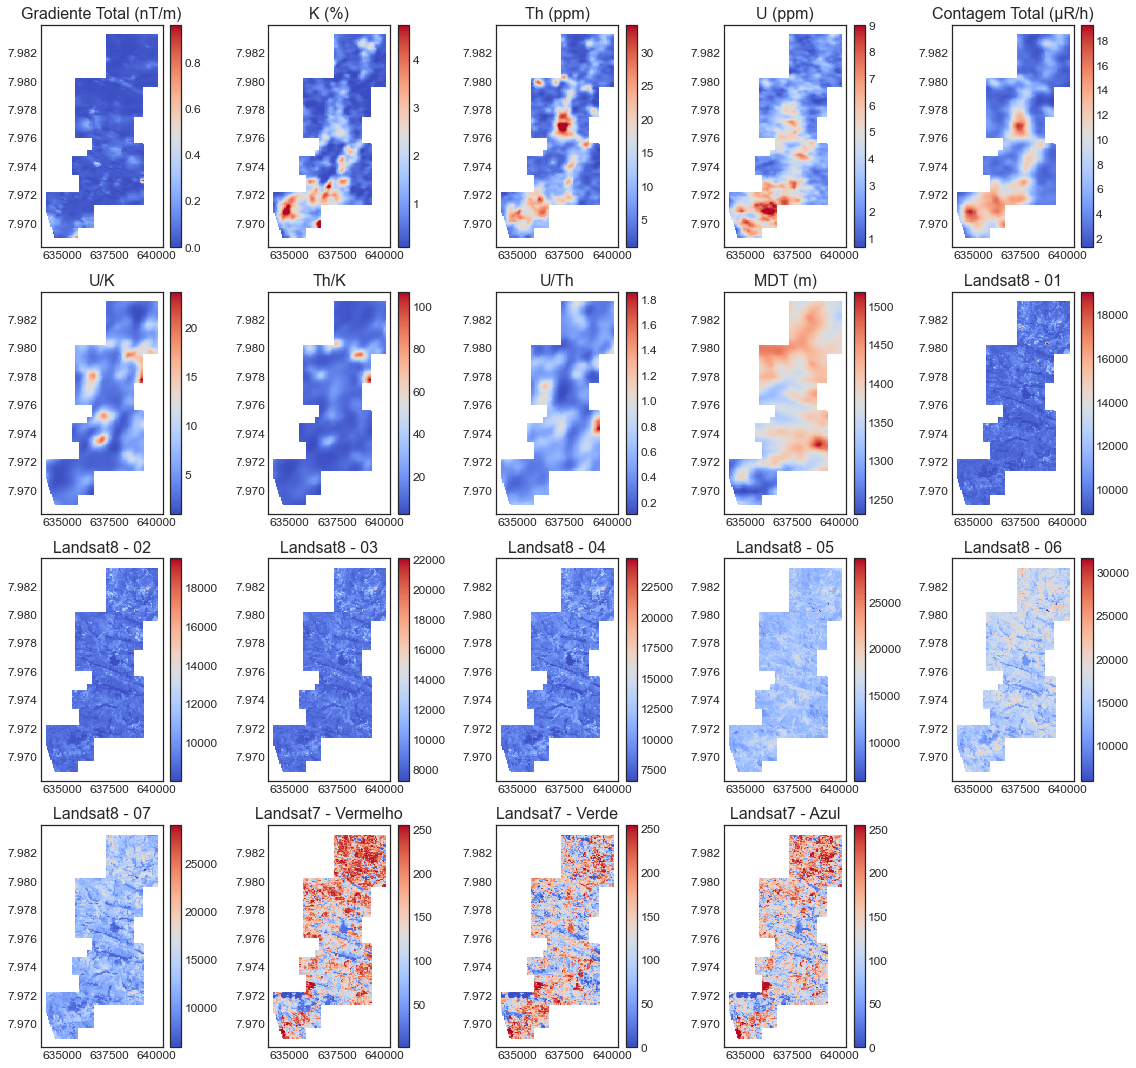

In [17]:
fig, axs = plt.subplots(nrows = 4, ncols = 5, figsize = (16, 15))

X, Y = COORD[0], COORD[1]

for ax, f in zip(axs.flat, dic_features):
    g = ax.scatter(data = df_plt, x = X, y = Y, c = f, cmap = cm, s = sz, marker = mk)
    fig.colorbar(g, ax = ax)
    ax.set_title(str(dic_features[f]), size = fs_title)
    
fig.delaxes(axs[3][4])
plt.tight_layout()

# salva mapas
if save_plots:
    plt.savefig("figures/notebook1/Figura_01.png", dpi = 300);

<p>
    <b>Figura 01:</b> Mapas das features.
</p>

<a id='7'></a>
## Descrição univariada

### Dados geofísicos

A função auxiliar [sumStats](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) é utilizada para computar o sumário estatístico das features geofísicas.

In [18]:
sumStats(df = df[GF])

,X̅,50%,Min,10%,99.5%,Max,Amp,S²,S,Cᵥ,Skew
GT,0.048625,0.033145,0.000000,0.011728,0.272914,0.962399,0.962399,0.002544,0.050442,1.037373,4.250229
K,1.019616,0.640000,0.102035,0.190000,4.718372,4.719150,4.617115,0.910206,0.954047,0.935692,1.461631
TH,9.012547,6.450000,0.904060,2.600000,34.057678,34.077900,33.173840,49.000155,7.000011,0.776696,1.235449
U,3.428294,2.945000,0.680000,1.520000,9.008372,9.009150,8.329150,3.184647,1.784558,0.520538,0.838544
CT,6.370295,4.930000,1.280000,2.460000,17.220000,19.280000,18.000000,15.867890,3.983452,0.625317,0.877143
U_K,5.380546,4.420000,0.970000,2.120000,18.119150,23.730000,22.760000,11.518617,3.393909,0.630774,1.518701
TH_K,12.626573,9.840000,2.230000,5.310000,74.419150,106.870000,104.640000,105.673929,10.279783,0.814139,3.621432
U_TH,0.479001,0.450000,0.110000,0.270000,1.290000,1.860000,1.750000,0.040191,0.200478,0.418534,1.401608


A *Figura 02* ilustra os histogramas das features geofísicas.

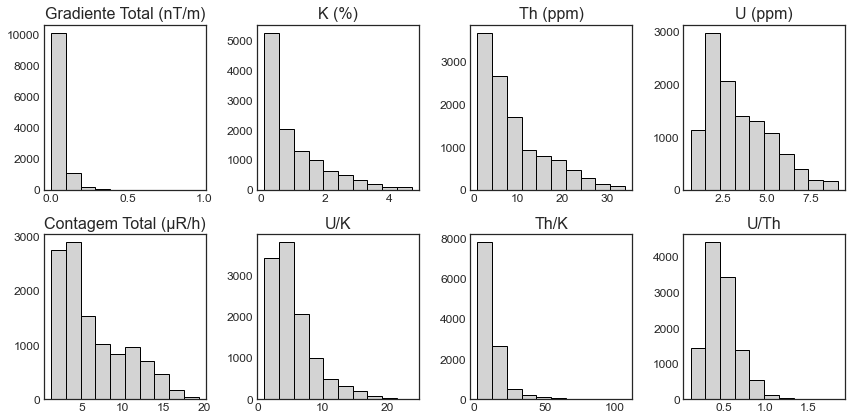

In [19]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 6))

for ax, gf in zip(axs.flat, GF):
    g = ax.hist(df[gf], color = col, edgecolor = ec)
    ax.set_title(str(dic_features[gf]), size = fs_title)

plt.tight_layout()

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_02.png", dpi = 300);

<p>
    <b>Figura 02:</b> Histogramas das features geofísicas.
</p>

> Todas as features geofísicas apresentam distribuições assimétricas positivas;

> As features geofísicas tendem a ser as mais erráticas do banco de dados, com destaque para o **Gradiente Total** que, por sua vez, apresenta um Cᵥ ~ 1.04.

### Sensores remotos

A função auxiliar [sumStats](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) é utilizada para computar o sumário estatístico dos demais sensores remotos.

In [20]:
sumStats(df = df[SR])

,X̅,50%,Min,10%,99.5%,Max,Amp,S²,S,Cᵥ,Skew
MDT,1376.713832,1383.765,1231.48,1309.447,1481.67555,1518.86,287.38,2.383816e+03,48.824333,0.035464,-0.751587
B01,9789.359345,9680.000,8905.00,9301.000,12100.06500,19037.00,10132.00,2.688853e+05,518.541536,0.052970,2.704648
B02,9127.988965,9012.000,8010.00,8523.000,11752.83000,19540.00,11530.00,3.767398e+05,613.791292,0.067243,2.429767
B03,8805.247154,8656.000,7272.00,8004.000,12105.57500,22051.00,14779.00,6.268228e+05,791.721443,0.089915,2.342953
B04,9057.911105,8924.000,6613.00,7781.700,13584.02500,24846.00,18233.00,1.360990e+06,1166.614752,0.128795,1.555522
B05,13390.707304,13203.000,5960.00,11855.000,17983.66000,29667.00,23707.00,2.014171e+06,1419.215064,0.105985,0.912569
B06,15849.828254,15917.500,5962.00,12605.400,22480.51500,31637.00,25675.00,6.095484e+06,2468.903304,0.155768,-0.011219
B07,12359.669207,12247.000,5885.00,9496.500,19146.06500,29052.00,23167.00,5.197637e+06,2279.832696,0.184457,0.312071
R,145.891487,147.000,1.00,54.000,254.00000,255.00,254.00,4.079400e+03,63.870183,0.437792,-0.208717
G,128.088106,125.500,0.00,45.000,253.00000,254.00,254.00,3.719145e+03,60.984790,0.476116,0.006455


A *Figura 03* ilustra os histogramas dos sensores remotos.

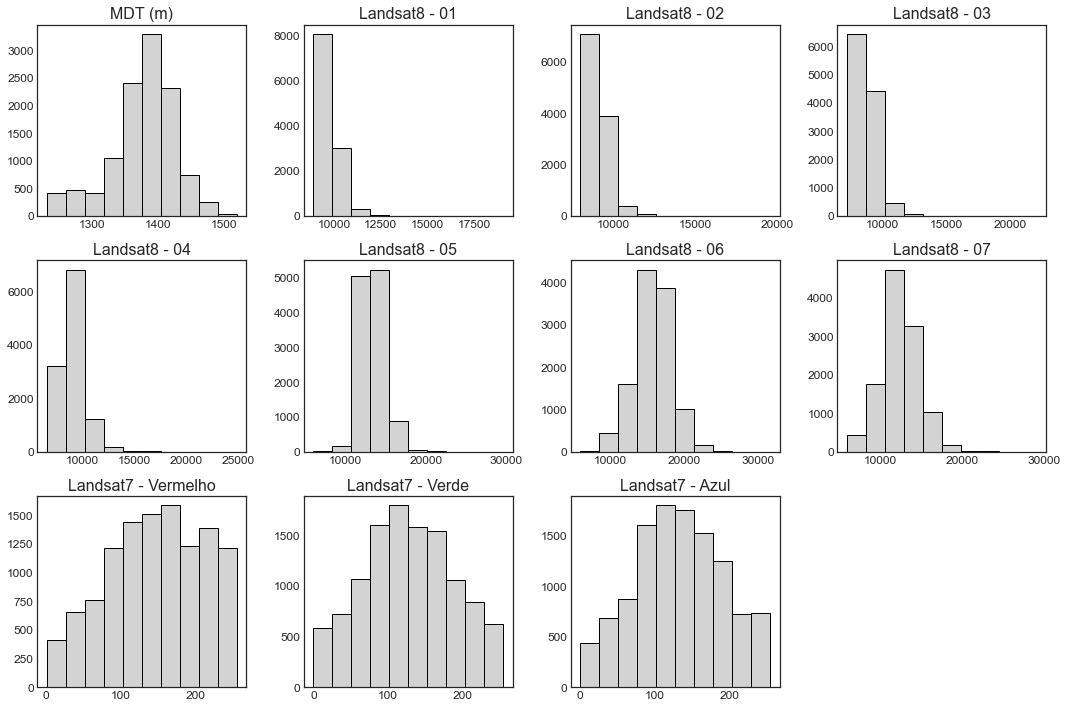

In [21]:
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))

for ax, sr in zip(axs.flat, SR):
    g = ax.hist(df[sr], color = col, edgecolor = ec)
    ax.set_title(str(dic_features[sr]), size = fs_title)

fig.delaxes(axs[2][3])
plt.tight_layout()

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_03.png", dpi = 300);

<p>
    <b>Figura 03:</b> Histogramas dos sensores remotos.
</p>

> A grande maioria dos sensores remotos apresentam distribuições assimétricas positivas ou quase simétricas;

> Apenas duas features apresentam distribuições assimétricas negativas: **MDT** e **Landsat7 - Vermelho**.

> Em geral, os sensores remotos tendem a ser pouco erráticos, com destaque para a **Banda Landsat8 - 09** que, por sua vez, apresenta um Cᵥ ~ 0.03.

### Dispersão das features

A *Figura 04* ilustra o **coeficiente de variação (Cᵥ)** de cada uma das features. A análise da erraticidade das features é importante para verificar se existem features aproximadamente constantes no banco de dados.

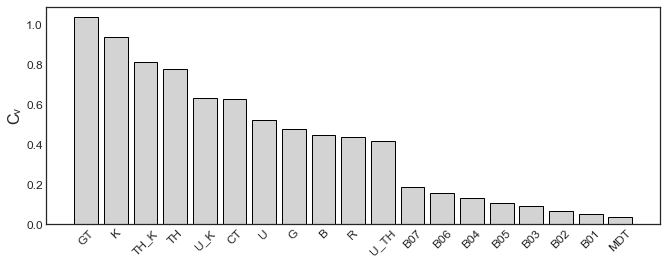

In [22]:
disp = sumStats(df = df[FEAT]).sort_values(by = 'Cᵥ', ascending = False)['Cᵥ']

plt.figure(figsize = (11,4))

plt.bar(x = disp.index, height = disp.values,
       color = col, edgecolor = ec)

plt.xticks(rotation = 45)
plt.ylabel("Cᵥ", size = fs_title)

# salva gráfico
if save_plots:
    plt.savefig("figures/notebook1/Figura_04.png", dpi = 300);

<p>
    <b>Figura 04:</b> Features e seus respectivos coeficientes de variação.
</p>

> Os sensores remotos tendem a ser muito pouco erráticos (Cᵥ < 0.2), com exceção das features `R`, `G` e `B` que, por sua vez, encontram-se entre as 10 features mais erráticas;

> Os dados geofísicos são, em geral os que apresentam maior dispersão, com exceção da razão `U_TH`.

### Frequência das unidades litoestratigráficas

A *Figura 05* apresenta a frequência de ocorrência das unidades litoestratigráficas na área do projeto.

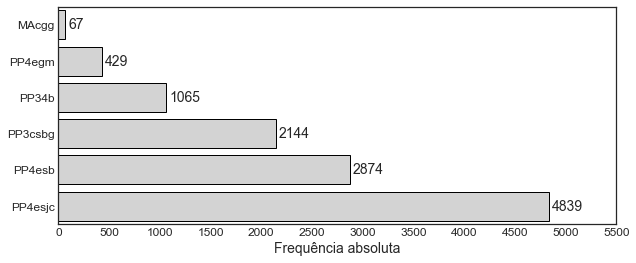

In [23]:
labels = df.COD.value_counts().sort_values().index
values = df.COD.value_counts().sort_values().values

plt.figure(figsize = (10, 4))

p = sns.countplot(y = 'COD', data = df, color = col, edgecolor = ec, order = labels)

for i, v in enumerate(values):
    p.text(v + 30, i, str(v), va='center', size = 14)
    
plt.xlabel("Frequência absoluta", size = 14)
plt.xticks(np.arange(0, 6000, 500))
plt.ylabel("")

# salva gráfico
if save_plots:
    plt.savefig("figures/notebook1/Figura_05.png", dpi = 300);

<p>
    <b>Figura 05:</b> Distribuição das unidades litoestratigráficas na área.
</p>

> As três unidades litoestratigráficas mais frequentes (`Fm_SJC`, `Fm_SB_E` e `Fm_BG`) representam mais de 80% do total de ocorrências;

> Portanto, as classes estão claramente desbalanceadas e algumas abordagens serão conduzidas posteriormente para lidar com esse problema.

<a id='8'></a>
## Descrição bivariada

### Correlação linear entre as features

A análise da correlação entre as variáveis no espaço das features é importante para detectar a existência de features redundantes no banco de dados. Uma maneira se fazer isso é a partir da estatística bivariada **coeficiente de correlação linear $r$**. A *Figura 06* apresenta uma matriz de correlação linear entre todas as features.

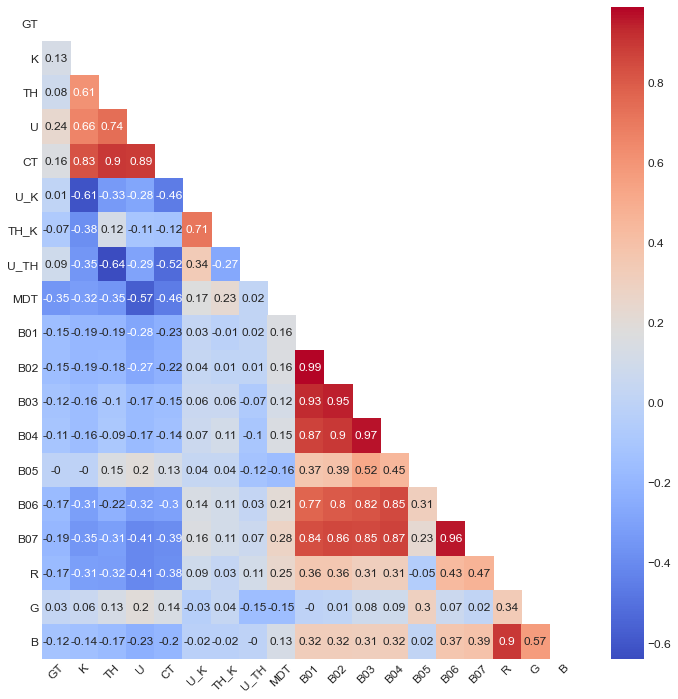

In [24]:
mx_pear = df[FEAT].corr().round(2)

mask = np.triu(np.ones_like(mx_pear, dtype = np.bool))

plt.figure(figsize = (12, 12))

ax = sns.heatmap(
                 mx_pear,
                 annot = True,
                 cmap = 'coolwarm',
                 cbar = True,
                 mask = mask
                )

ax.set_xticklabels(FEAT, rotation = 45)
ax.set_yticklabels(FEAT, rotation = 0)

# salva matriz
if save_plots:
    plt.savefig("figures/notebook1/Figura_06.png", dpi = 300);

<p>
    <b>Figura 06:</b> Matriz de correlação linear entre as features.
</p>

> As features `U`, `TH` e `K` apresentam correlações lineares positivas médias a fortes entre si;

> As features `U`, `TH` e `K` apresentam forte correlação linear positiva com a variável `CT`, o que já era esperado;

> As features `U_K`, `TH_K`, `U_TH` apresentam forte correlação linear positiva com os canais radiométricos.

> A feature `GT` não apresenta correlação significativa com nenhuma outra feature;

> As features Landsat 8 apresentam fortíssimas correlações lineares entre si. Esse fato pode implicar em multicolinearidade e deve ser tratado cautelosamente.A única exceção é a feature `B05`.

### Features geofísicas x unidades

A *Figura 07* ilustra os boxplots das features geofísicas agrupadas pelas unidades litoestratigráficas. O objetivo dessa análise é verificar quais features apresentam maior dispersão entre as unidades. A função auxiliar [plotBoxplots](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) é utilizada para plotar os boxplots por unidades.

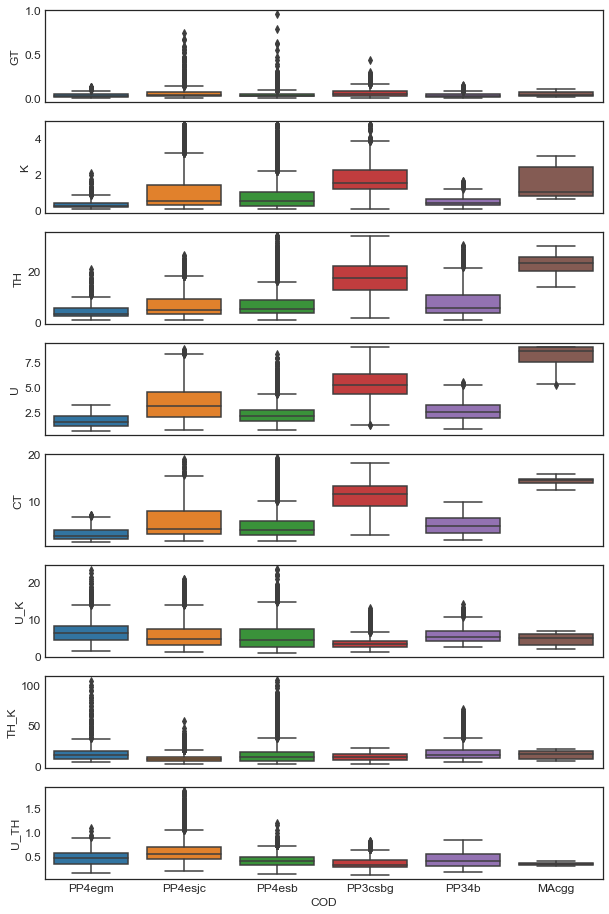

In [25]:
plotBoxplots(df, cols = GF)

# salva gráfico
if save_plots:
    plt.savefig("figures/notebook1/Figura_07.png", dpi = 300);

<p>
    <b>Figura 07:</b> Boxplots das features geofísicas agrupadas pelas unidades.
</p>

> As features radiométricas apresentam uma variabilidade significativa quando agrupadas pelas unidades litoestratigráficas. Essas variáveis possivelmente serão as **mais importantes** para treinar os modelos;

> Em contrapartida, a variável magnetométrica `GT` apresenta-se praticamente constante quando agrupada pelas unidades.

### Sensores remotos x unidades

A *Figura 08* são apresentados boxplots dos sensores remotos agrupados pelas unidades litoestratigráficas. A função auxiliar [plotBoxplots](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) é utilizada para plotar os boxplots por unidades.

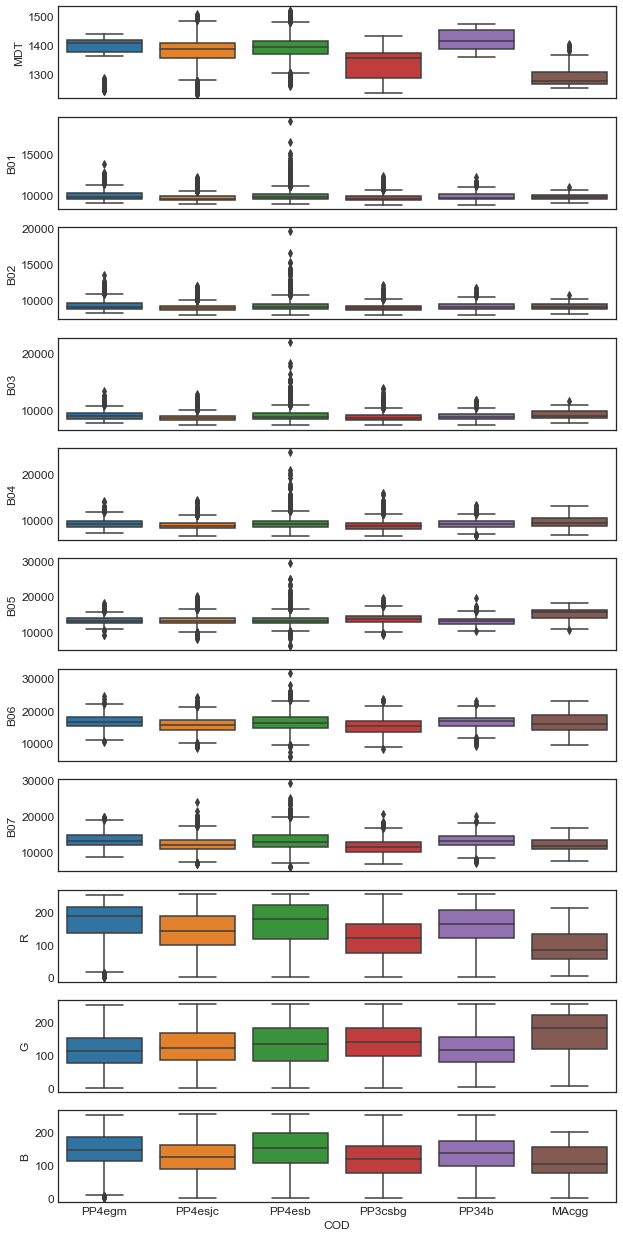

In [26]:
plotBoxplots(df, cols = SR)

# salva gráfico
if save_plots:
    plt.savefig("figures/notebook1/Figura_08.png", dpi = 300);

<p>
    <b>Figura 08:</b> Boxplots dos sensores remotos agrupados pelas unidades.
</p>

> As features Landsat 8 apresentam uma variabilidade extremamente baixa quando agrupadas pelas unidades. Nesse sentido, possivelmente, essas variáveis não serão úteis para treinar os modelos;

> Em contrapartida, as features geofísicas, juntamente com `MDT`, `R`, `G` e `B`, apresentam uma dispersão significativa quando agrupadas pelas unidades. Essas variáveis possivelmente contribuirão positivamente para as predições.

### K (%) x unidades

A função auxiliar [sumByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) retorna o sumário estatístico de `K` agrupado pelas unidades litoestratigráficas.

In [27]:
sumByLito(df, f = 'K')

COD          MAcgg        PP34b      PP3csbg      PP4egm       PP4esb  \
K count  67.000000  1065.000000  2144.000000  429.000000  2874.000000   
  mean    1.530149     0.507524     1.737816    0.380753     0.828077   
  std     0.809286     0.264226     0.864550    0.314473     0.877530   
  min     0.670000     0.102035     0.102035    0.102035     0.102035   
  10%     0.710000     0.210000     0.830000    0.110000     0.130000   
  50%     1.050000     0.450000     1.540000    0.280000     0.520000   
  99.5%   2.990400     1.417200     4.719150    1.708800     4.719150   
  max     3.030000     1.640000     4.719150    2.060000     4.719150   

COD          PP4esjc  
K count  4839.000000  
  mean      0.977439  
  std       0.988361  
  min       0.102035  
  10%       0.190000  
  50%       0.510000  
  99.5%     4.713612  
  max       4.719150

A *Figura 09* apresenta os histogramas da variável `K` agrupada pelas unidades litoestratigráficas. Os histogramas são plotados a partir da função auxiliar [histByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py).

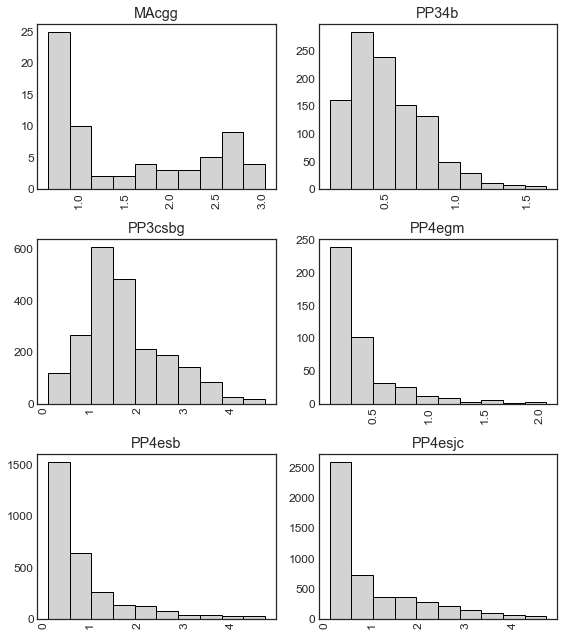

In [28]:
histByLito(df, f = 'K', col = col, ec = ec)

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_09.png", dpi = 300);

<p>
    <b>Figura 09:</b> Histogramas de K(%) agrupados pelas unidades litoestratigráficas.
</p>

> As unidades que apresentam maiores concentrações de `K` são **PP3csbg** e **MAcgg**;

> As unidades que apresentam menores concentrações de `K` são **PP4egm** e **PP34b**.

### U (ppm) x unidades

A função auxiliar [sumByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) retorna o sumário estatístico de `U` agrupado pelas unidades litoestratigráficas.

In [29]:
sumByLito(df, f = 'U')

COD          MAcgg        PP34b      PP3csbg      PP4egm       PP4esb  \
U count  67.000000  1065.000000  2144.000000  429.000000  2874.000000   
  mean    8.048590     2.672779     5.342055    1.713100     2.434993   
  std     1.123448     0.927108     1.513818    0.662133     1.103879   
  min     5.260000     0.890000     1.230000    0.680000     0.760000   
  10%     5.976000     1.590000     3.473000    0.910000     1.450000   
  50%     8.580000     2.510000     5.220000    1.590000     2.130000   
  99.5%   9.009150     5.193600     9.009150    3.178600     6.711750   
  max     9.009150     5.550000     9.009150    3.280000     8.260000   

COD          PP4esjc  
U count  4839.000000  
  mean      3.424683  
  std       1.624880  
  min       0.750000  
  10%       1.530000  
  50%       3.110000  
  99.5%     8.088100  
  max       8.750000

A *Figura 10* apresenta os histogramas da variável `U` agrupada pelas unidades litoestratigráficas. Os histogramas são plotados a partir da função auxiliar [histByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py).

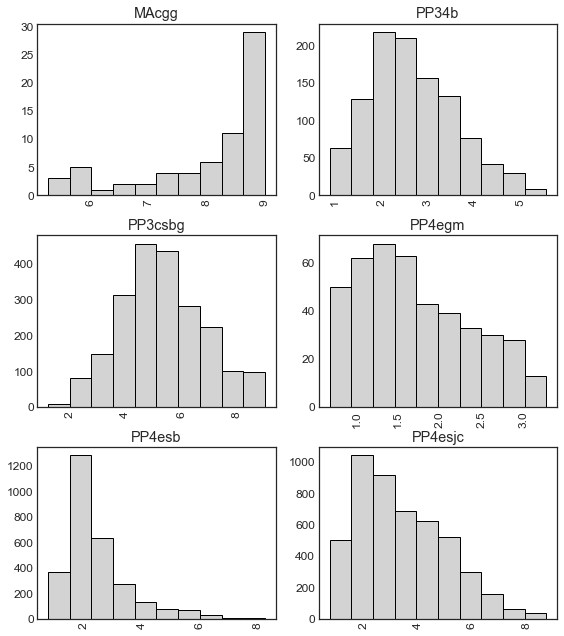

In [30]:
histByLito(df, f = 'U', col = col, ec = ec)

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_10.png", dpi = 300);

<p>
    <b>Figura 10:</b> Histogramas de U(ppm) agrupados pelas unidades litoestratigráficas.
</p>

> As unidades que apresentam maiores concentrações de `U` são **MAcgg** e **PP3csbg**;

> As unidades que apresentam menores concentrações de `U` são **PP4egm** e **PP4esb**.

### Th (ppm) x unidades

A função auxiliar [sumByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) retorna o sumário estatístico de `TH` agrupado pelas unidades litoestratigráficas.

In [31]:
sumByLito(df, f = 'TH')

COD           MAcgg        PP34b      PP3csbg      PP4egm       PP4esb  \
TH count  67.000000  1065.000000  2144.000000  429.000000  2874.000000   
   mean   22.975672     7.873185    17.695545    4.527979     7.059290   
   std     3.797475     5.929626     6.921890    3.576300     5.202662   
   min    13.870000     0.904060     1.660000    0.904060     0.910000   
   10%    18.066000     2.364000     9.340000    1.458000     2.810000   
   50%    23.500000     5.550000    17.360000    3.400000     5.255000   
   99.5%  29.808500    28.274400    34.077900   19.330400    28.798150   
   max    29.990000    30.320000    34.077900   21.160000    34.077900   

COD           PP4esjc  
TH count  4839.000000  
   mean      6.780493  
   std       4.883175  
   min       0.904060  
   10%       2.280000  
   50%       4.990000  
   99.5%    22.898600  
   max      26.580000

A *Figura 11* apresenta os histogramas da variável `TH` agrupada pelas unidades litoestratigráficas. Os histogramas são plotados a partir da função auxiliar [histByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py).

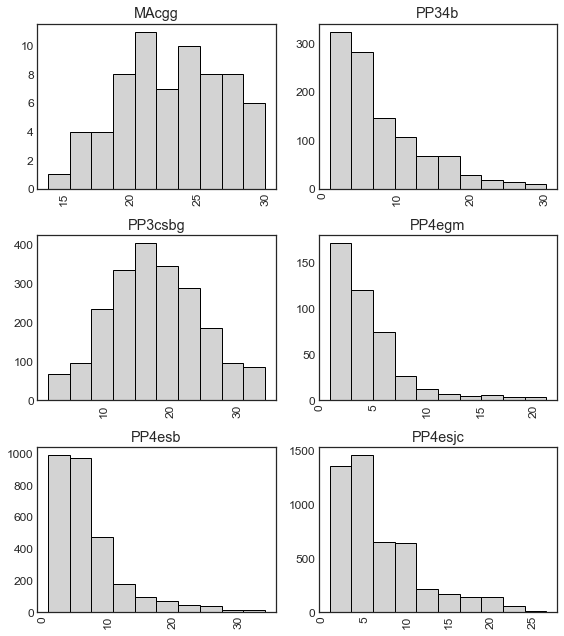

In [32]:
histByLito(df, f = 'TH', col = col, ec = ec)

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_11.png", dpi = 300);

<p>
    <b>Figura 11:</b> Histogramas de Th(ppm) agrupados pelas unidades litoestratigráficas.
</p>

> As unidades que apresentam maiores concentrações de `TH` são **MAcgg** e **PP3csbg** (mesmas do `U`);

> As unidades que apresentam menores concentrações de `TH` são **PP4egm** e **PP4esjc**.

### Contagem Total (μR/h) x unidades

A função auxiliar [sumByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) retorna o sumário estatístico de `CT` agrupado pelas unidades litoestratigráficas.

In [33]:
sumByLito(df, f = 'CT')

COD           MAcgg        PP34b      PP3csbg      PP4egm       PP4esb  \
CT count  67.000000  1065.000000  2144.000000  429.000000  2874.000000   
   mean   14.321194     4.879521    11.075378    2.988228     4.857895   
   std     0.754621     1.941133     3.185502    1.362593     3.075458   
   min    12.470000     1.810000     2.700000    1.280000     1.520000   
   10%    13.256000     2.470000     6.790000    1.558000     2.410000   
   50%    14.450000     4.710000    11.455000    2.500000     3.810000   
   99.5%  15.727500     9.567600    17.871350    6.963200    17.679050   
   max    15.810000     9.770000    18.290000    7.020000    19.280000   

COD           PP4esjc  
CT count  4839.000000  
   mean      5.701730  
   std       3.512589  
   min       1.410000  
   10%       2.460000  
   50%       4.090000  
   99.5%    14.658600  
   max      19.080000

A *Figura 12* apresenta os histogramas da variável `CT` agrupada pelas unidades litoestratigráficas. Os histogramas são plotados a partir da função auxiliar [histByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py).

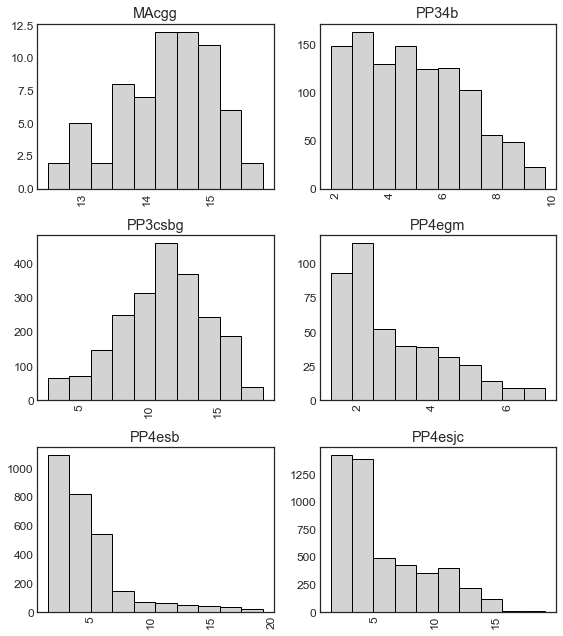

In [34]:
histByLito(df, f = 'CT', col = col, ec = ec)

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_12.png", dpi = 300);

<p>
    <b>Figura 12:</b> Histogramas de Contagem Total(μR/h) agrupados pelas unidades litoestratigráficas.
</p>

> As unidades que apresentam maiores concentrações de `CT` são **MAcgg** e **PP3csbg** (mesmas do `U` e `TH`);

> As unidades que apresentam menores concentrações de `CT` são **PP4egm** e **PP4esb** (mesmas do `U`).

### Gradiente Total (nT/m) x unidades

A função auxiliar [sumByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) retorna o sumário estatístico de `GT` agrupado pelas unidades litoestratigráficas.

In [35]:
sumByLito(df, f = 'GT')

COD           MAcgg        PP34b      PP3csbg      PP4egm       PP4esb  \
GT count  67.000000  1065.000000  2144.000000  429.000000  2874.000000   
   mean    0.043463     0.030466     0.059876    0.029046     0.039351   
   std     0.026423     0.023744     0.050648    0.023524     0.047359   
   min     0.012960     0.001470     0.001725    0.003204     0.001291   
   10%     0.018700     0.010169     0.015405    0.007889     0.010987   
   50%     0.036008     0.023080     0.043326    0.020587     0.025593   
   99.5%   0.105040     0.131172     0.248638    0.121066     0.281150   
   max     0.105082     0.144330     0.437557    0.129563     0.962399   

COD           PP4esjc  
GT count  4839.000000  
   mean      0.054952  
   std       0.055674  
   min       0.000000  
   10%       0.012736  
   50%       0.037857  
   99.5%     0.348145  
   max       0.743154

A *Figura 13* apresenta os histogramas da variável `GT` agrupada pelas unidades litoestratigráficas. Os histogramas são plotados a partir da função auxiliar [histByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py).

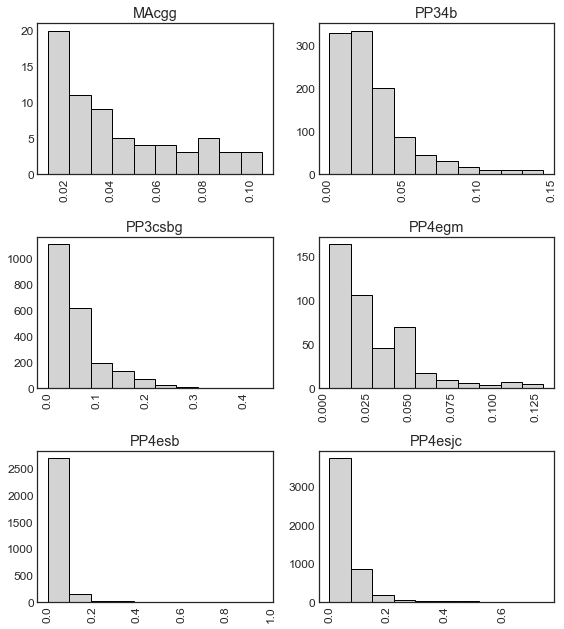

In [36]:
histByLito(df, f = 'GT', col = col, ec = ec)

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_13.png", dpi = 300);

<p>
    <b>Figura 13:</b> Histogramas de Gradiente Total(nT/m) agrupados pelas unidades litoestratigráficas.
</p>

> As unidades que apresentam maiores respostas de `GT` são **PP3csbg** e **PP4esjc**;

> As unidades que apresentam menores respostas de `GT` são **PP4egm** e **PP34b**.

### MDT (m) x unidades

A função auxiliar [sumByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py) retorna o sumário estatístico de `MDT` agrupado pelas unidades litoestratigráficas.

In [37]:
sumByLito(df, f = 'MDT')

COD              MAcgg        PP34b      PP3csbg       PP4egm       PP4esb  \
MDT count    67.000000  1065.000000  2144.000000   429.000000  2874.000000   
    mean   1296.507015  1417.074413  1336.938265  1379.440909  1389.737133   
    std      44.885871    34.316553    50.437381    59.779415    37.453901   
    min    1253.240000  1359.450000  1236.810000  1243.720000  1260.320000   
    10%    1258.996000  1373.270000  1256.744000  1261.590000  1342.988000   
    50%    1275.390000  1414.320000  1354.135000  1408.020000  1393.035000   
    99.5%  1403.426500  1470.612000  1425.613900  1438.280400  1505.695850   
    max    1404.730000  1471.540000  1433.020000  1439.050000  1518.860000   

COD            PP4esjc  
MDT count  4839.000000  
    mean   1378.588138  
    std      42.535305  
    min    1231.480000  
    10%    1325.648000  
    50%    1385.790000  
    99.5%  1476.159200  
    max    1507.200000

A *Figura 14* apresenta os histogramas da variável `MDT` agrupada pelas unidades litoestratigráficas. Os histogramas são plotados a partir da função auxiliar [histByLito](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/functions/Custom_Stats.py).

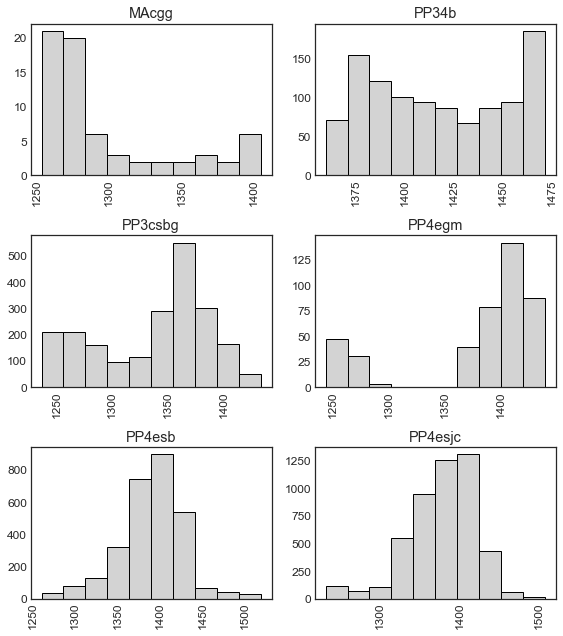

In [38]:
histByLito(df, f = 'MDT', col = col, ec = ec)

# salva gráficos
if save_plots:
    plt.savefig("figures/notebook1/Figura_14.png", dpi = 300);

<p>
    <b>Figura 14:</b> Histogramas de MDT(m) agrupados pelas unidades litoestratigráficas.
</p>

> As unidades que apresentam maiores valores de `MDT` são **PP34b** e **PP4egm**;

> As unidades que apresentam menores valores de `MDT` são **MAcgg** e **PP3csbg**.

> A unidade **PP4egm** apresenta um conjunto de valores baixos de `MDT`. Esses pontos devem estar associados à ocorrência da formação na porção NE da área.

<a id='9'></a>
## Exportação dos dados

Os dados serão exportados (`data_nb2.csv`) para serem utilizados como entrada no [notebook2.ipynb](https://github.com/fnaghetini/Mapa-Preditivo/blob/main/notebook2.ipynb).

In [39]:
# colunas a serem descartadas
drop_cols = ['LINE','X','Y']

# exclusão das colunas
df.drop(drop_cols, axis = 1, inplace = True)

# renomeação das coordenadas
df.rename(columns = {'X_SIR' : 'X', 'Y_SIR' : 'Y'}, inplace = True)

# exportação dos dados
df.to_csv('data/data_nb2.csv', header = True, index = False)